In [1]:
import MDAnalysis as mda
from MDAnalysis import transformations
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from MDAnalysis.analysis.hydrogenbonds.hbond_analysis import (HydrogenBondAnalysis as HBA)
import solvation_analysis
from solvation_analysis.solute import Solute
from solvation_analysis.residence import Residence
from matplotlib.pyplot import savefig

In [2]:
import nglview

def visualize(selection):
    mda_view = nglview.show_mdanalysis(selection)
    return mda_view.display()
from ipywidgets import Text
Text("Hello, World")

Text(value='Hello, World')

## 1trimer

In [3]:
# instantiate solution

In [4]:
u1 = mda.Universe('output1/topology.pdb',"output1/trajectory_wrap.dcd")

In [93]:
visualize(u1.atoms)

NGLWidget(max_frame=1499)

In [6]:
# simulation_1
# get box volume
# import box size from state.txt
volume_nm1 = pd.read_csv('output1/state.txt')["Box Volume (nm^3)"].values[-1]
# convert to A 10^-8
volume1 = volume_nm1 * 1000
# side of the box
l1 = volume1**(1/3)
# lengths *a*, *b*, *c* are in the MDAnalysis length unit (Å), and angles are in degrees.
box1 = [l1,l1,l1,90,90,90]
# telling trajectory box size
set_dim1 = transformations.boxdimensions.set_dimensions(box1)
# manually set the box size
u1.trajectory.add_transformations(set_dim1) 

In [7]:
# HCl
mol_1 = u1.select_atoms('byres element C')
Cl_1 = u1.select_atoms('byres element Cl')
h2O_1 = u1.select_atoms('byres (smarts [OH2])')
h2O_O_1 = h2O_1.select_atoms('element O')
h2O_H_1 = h2O_1.select_atoms('element H')
h3O_1= u1.select_atoms('(byres element O) and (not byres element C)')-h2O_1
h3O_O_1 = h3O_1.select_atoms('element O')
h3O_H_1 = h3O_1.select_atoms('element H')
ether_O_1 = mol_1.select_atoms('smarts COC').select_atoms('element O')
ketone_O_1 = mol_1.select_atoms('smarts C=O').select_atoms('element O')
oh_O_1 = mol_1.select_atoms('smarts [OX2H]')
N3_1 = mol_1.select_atoms('element N')
react_C1 = mol_1.select_atoms('smarts C=N').select_atoms('element C')

## 1 small molecule + HCl

In [8]:
solution_Cl = Solute.from_atoms(Cl_1, {'H2O': h2O_O_1, 'H3O': h3O_O_1}, solute_name ="Cl",radii={"H2O": 4,"H3O": 4})

In [9]:
# rename_solutes = {'solute_0': 'Cl'}
# solution_Cl = Solute.from_atoms(
#     Cl_1, 
#     {'H2O': h2O_O_1, 'H3O': h3O_O_1}, 
#     solute_name ="Cl", 
#     rename_solutes = rename_solutes,
#     radii={"H2O": 4,"H3O": 4}
# )
# solution_Cl.draw_molecule('Cl')

In [10]:
solution_Cl.atom_solutes

{'Cl': <solvation_analysis.solute.Solute at 0x148059610>}

In [11]:
solution_Cl.radii['H2O'] = 3.7
solution_Cl.radii['H3O'] = 3.2
solution_Cl.run(step = 2)

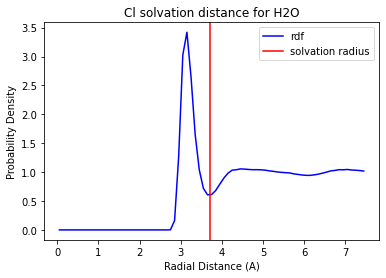

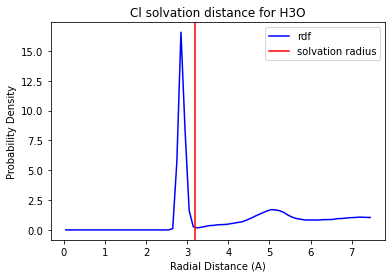

In [12]:
for solvent in solution_Cl.solvents.keys():
    # plot the RDF!
    solution_Cl.plot_solvation_radius("Cl", solvent)
    plt.show()

In [13]:
solution_Cl.solvation_data.head(5)

distance solute solvent  \
frame solute_ix solute_atom_ix solvent_atom_ix                            
0     910       2730           2881             2.791217     Cl     H3O   
                               876              2.914895     Cl     H2O   
                               2619             3.082048     Cl     H2O   
                               1266             3.281428     Cl     H2O   
                               1197             3.504671     Cl     H2O   

                                                solvent_ix  
frame solute_ix solute_atom_ix solvent_atom_ix              
0     910       2730           2881                   1016  
                               876                     292  
                               2619                    873  
                               1266                    422  
                               1197                    399

In [14]:
solution_Cl.coordination.cn_dict

{'H2O': 5.0563663003663, 'H3O': 0.8913260073260073}

In [15]:
residence_Cl = Residence.from_solute(solution_Cl)

In [16]:
residence_Cl.residence_times_cutoff

{'H2O': 2, 'H3O': 56}

In [17]:
residence_Cl.residence_times_fit

{'H2O': 1.92, 'H3O': 60.04}

/Users/user/software/solvation-analysis/solvation_analysis/residence.py:197: UserWarning: The fit for H2O failed so the exponential fit will not be plotted.
  warnings.warn(f'The fit for {res_name} failed so the exponential '


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Timestep (frames)', ylabel='Normalized Autocovariance'>)

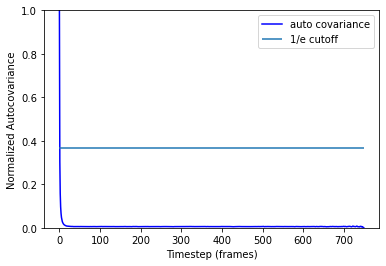

In [18]:
residence_Cl.plot_auto_covariance('H2O')

/Users/user/software/solvation-analysis/solvation_analysis/residence.py:197: UserWarning: The fit for H3O failed so the exponential fit will not be plotted.
  warnings.warn(f'The fit for {res_name} failed so the exponential '


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Timestep (frames)', ylabel='Normalized Autocovariance'>)

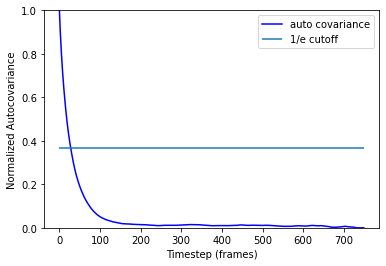

In [19]:
residence_Cl.plot_auto_covariance('H3O')

### N- solvent RT

In [20]:
solution1_N1 = Solute.from_atoms(N3_1, {'H2O': h2O_O_1, 'H3O': h3O_O_1, 'Cl':Cl_1}, solute_name ="N")


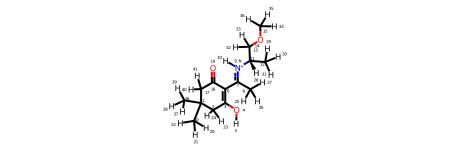

In [21]:
rename_solutes = {'solute_0': 'N_1'}
solution1_N1 = Solute.from_atoms(
    N3_1, 
    {'H2O': h2O_O_1, 'H3O': h3O_O_1, 'Cl': Cl_1}, 
    solute_name ="N", 
    rename_solutes = rename_solutes,
    radii={"H2O": 3.7,"H3O": 4, "Cl": 4}
)
solution1_N1.draw_molecule('N')

In [22]:
solution1_N1.atom_solutes

{'N': <solvation_analysis.solute.Solute at 0x1482471c0>}

In [23]:
solution1_N1.radii['H2O'] = 3.7
solution1_N1.radii['H3O'] = 4.5
solution1_N1.radii['Cl'] = 4
solution1_N1.run(step = 2)

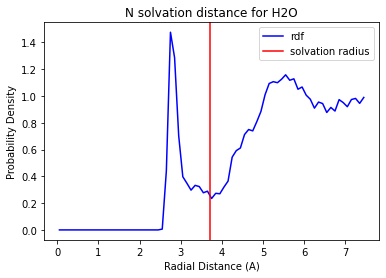

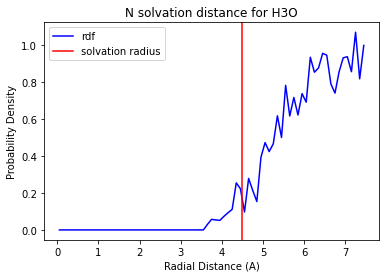

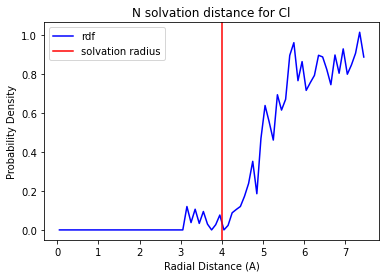

In [24]:
for solvent in solution1_N1.solvents.keys():
    # plot the RDF!
    solution1_N1.plot_solvation_radius("N_1", solvent)
    plt.show()

In [25]:
solution1_N1.solvation_data.head(5)

distance solute solvent  \
frame solute_ix solute_atom_ix solvent_atom_ix                            
0     1091      3190           2804             3.240274      N      Cl   
                               3145             4.014853      N     H3O   
2     1091      3190           2646             3.199778      N     H2O   
                               2804             3.354209      N      Cl   
4     1091      3190           2804             3.425165      N      Cl   

                                                solvent_ix  
frame solute_ix solute_atom_ix solvent_atom_ix              
0     1091      3190           2804                    984  
                               3145                   1082  
2     1091      3190           2646                    882  
                               2804                    984  
4     1091      3190           2804                    984

In [26]:
solution1_N1.coordination.cn_dict

{'Cl': 0.021333333333333333, 'H2O': 1.8826666666666667, 'H3O': 0.056}

In [27]:
residence1_N1 = Residence.from_solute(solution1_N1)

In [28]:
residence1_N1.residence_times_cutoff

{'Cl': 4, 'H2O': 8, 'H3O': 2}

In [29]:
residence1_N1.residence_times_fit

{'Cl': 5.17, 'H2O': 10.4, 'H3O': 1.14}

/Users/user/software/solvation-analysis/solvation_analysis/residence.py:197: UserWarning: The fit for H2O failed so the exponential fit will not be plotted.
  warnings.warn(f'The fit for {res_name} failed so the exponential '


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Timestep (frames)', ylabel='Normalized Autocovariance'>)

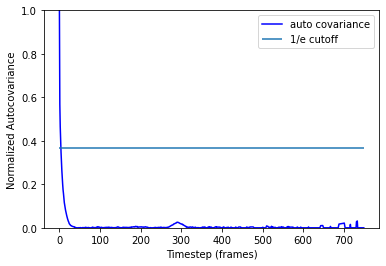

In [30]:
residence1_N1.plot_auto_covariance('H2O')

/Users/user/software/solvation-analysis/solvation_analysis/residence.py:197: UserWarning: The fit for H3O failed so the exponential fit will not be plotted.
  warnings.warn(f'The fit for {res_name} failed so the exponential '


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Timestep (frames)', ylabel='Normalized Autocovariance'>)

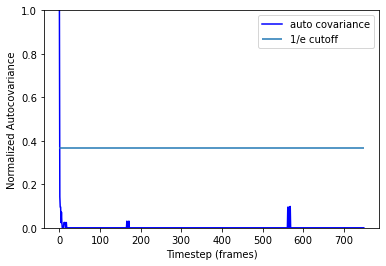

In [31]:
residence1_N1.plot_auto_covariance('H3O')

/Users/user/software/solvation-analysis/solvation_analysis/residence.py:197: UserWarning: The fit for Cl failed so the exponential fit will not be plotted.
  warnings.warn(f'The fit for {res_name} failed so the exponential '


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Timestep (frames)', ylabel='Normalized Autocovariance'>)

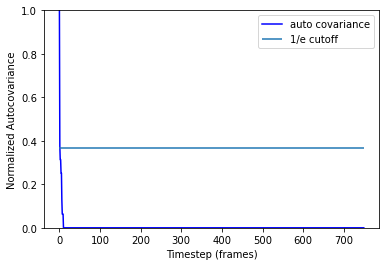

In [32]:
residence1_N1.plot_auto_covariance('Cl')

### solution1 of react_C1

In [33]:
solution1_C1 = Solute.from_atoms(react_C1, {'H2O': h2O_O_1, 'H3O': h3O_O_1, 'Cl': Cl_1}, \
                                 solute_name = "reaction_center", radii={"H2O": 4.1,"H3O": 4, "Cl": 4.5})


In [34]:
print(solution1_C1.atom_solutes)

{'reaction_center': <solvation_analysis.solute.Solute object at 0x149a01070>}


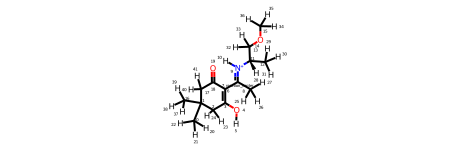

In [35]:
rename_solutes = {'solute_0': 'C_1'}
solution1_C1 = Solute.from_atoms(
    react_C1, {'H2O': h2O_O_1, 'H3O': h3O_O_1, 'Cl': Cl_1}, 
    solute_name = "reaction_center", 
    radii={"H2O": 4.1,"H3O": 4, "Cl": 4.5},
    rename_solutes = rename_solutes,
)
solution1_C1.draw_molecule('reaction_center')

In [36]:
solution1_C1.atom_solutes

{'reaction_center': <solvation_analysis.solute.Solute at 0x14daab2e0>}

In [37]:
solution1_C1.solvents

{'H2O': <AtomGroup with 910 atoms>,
 'H3O': <AtomGroup with 90 atoms>,
 'Cl': <AtomGroup with 91 atoms>}

In [38]:
solution1_C1.radii['H2O'] =4.1
solution1_C1.radii['H3O'] = 3.55
solution1_C1.radii['Cl'] = 4.3
solution1_C1.run(step = 2)

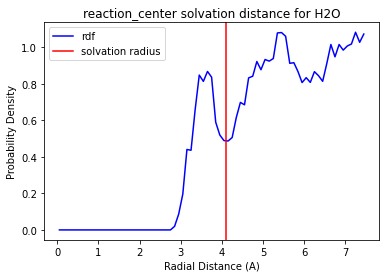

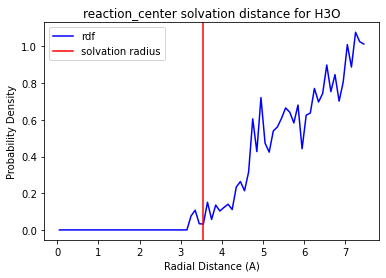

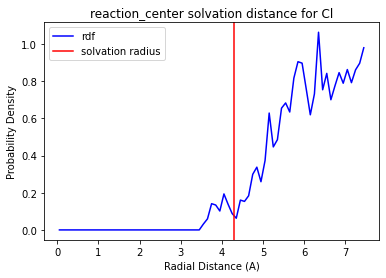

In [39]:
for solvent in solution1_C1.solvents.keys():
    # plot the RDF!
    solution1_C1.plot_solvation_radius("C_1", solvent)
    plt.show()

In [40]:
solution1_C1.solvation_data.head(5)

distance           solute  \
frame solute_ix solute_atom_ix solvent_atom_ix                              
0     1091      3188           48               3.833486  reaction_center   
                               2646             4.060387  reaction_center   
                               2804             4.077920  reaction_center   
2     1091      3188           2646             3.364042  reaction_center   
                               48               3.954492  reaction_center   

                                               solvent  solvent_ix  
frame solute_ix solute_atom_ix solvent_atom_ix                      
0     1091      3188           48                  H2O          16  
                               2646                H2O         882  
                               2804                 Cl         984  
2     1091      3188           2646                H2O         882  
                               48                  H2O          16

In [41]:
solution1_C1.coordination.cn_dict

{'Cl': 0.04666666666666666, 'H2O': 2.941333333333333, 'H3O': 0.008}

In [42]:
residence1_C1 = Residence.from_solute(solution1_C1)

In [43]:
residence1_C1.residence_times_cutoff

{'Cl': 2, 'H2O': 4, 'H3O': 2}

In [44]:
residence1_C1.residence_times_fit

{'Cl': 1.29, 'H2O': 6.31, 'H3O': 1.9}

/Users/user/software/solvation-analysis/solvation_analysis/residence.py:197: UserWarning: The fit for H2O failed so the exponential fit will not be plotted.
  warnings.warn(f'The fit for {res_name} failed so the exponential '


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Timestep (frames)', ylabel='Normalized Autocovariance'>)

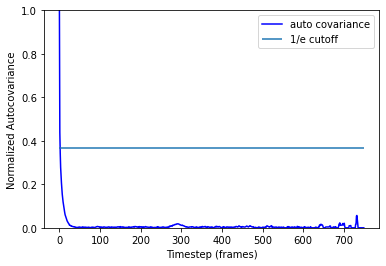

In [45]:
residence1_C1.plot_auto_covariance('H2O')

/Users/user/software/solvation-analysis/solvation_analysis/residence.py:197: UserWarning: The fit for H3O failed so the exponential fit will not be plotted.
  warnings.warn(f'The fit for {res_name} failed so the exponential '


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Timestep (frames)', ylabel='Normalized Autocovariance'>)

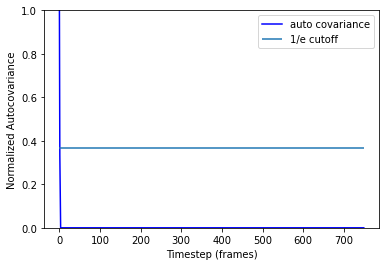

In [46]:
residence1_C1.plot_auto_covariance('H3O')

/Users/user/software/solvation-analysis/solvation_analysis/residence.py:197: UserWarning: The fit for Cl failed so the exponential fit will not be plotted.
  warnings.warn(f'The fit for {res_name} failed so the exponential '


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Timestep (frames)', ylabel='Normalized Autocovariance'>)

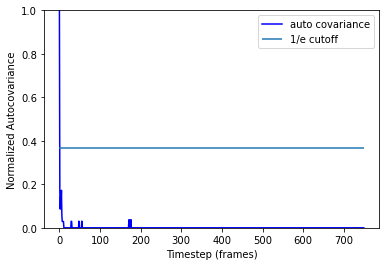

In [47]:
residence1_C1.plot_auto_covariance('Cl')

### solution1 of ether O

In [48]:
solution1_O1 = Solute.from_atoms(ether_O_1, {'H2O': h2O_O_1, 'H3O': h3O_O_1, 'Cl': Cl_1}, \
                                 solute_name = "ether_O", radii={"H2O": 4.1,"H3O": 4, "Cl": 4.5})


In [49]:
print(solution1_O1.atom_solutes)

{'ether_O': <solvation_analysis.solute.Solute object at 0x14b7eb4c0>}


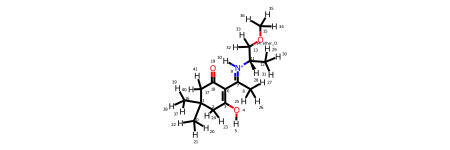

In [50]:
rename_solutes = {'solute_0': 'ether_O_1'}
solution1_O1 = Solute.from_atoms(
    ether_O_1, {'H2O': h2O_O_1, 'H3O': h3O_O_1, 'Cl': Cl_1}, 
    solute_name = "ether_O", 
    radii={"H2O": 4.1,"H3O": 4, "Cl": 4.5},
    rename_solutes = rename_solutes,
)
solution1_O1.draw_molecule('ether_O')

In [51]:
solution1_O1.atom_solutes

{'ether_O': <solvation_analysis.solute.Solute at 0x14bcb81f0>}

In [52]:
solution1_O1.solvents

{'H2O': <AtomGroup with 910 atoms>,
 'H3O': <AtomGroup with 90 atoms>,
 'Cl': <AtomGroup with 91 atoms>}

In [53]:
solution1_O1.radii['H2O'] = 6
solution1_O1.radii['H3O'] = 3.15
solution1_O1.radii['Cl'] = 6.1
solution1_O1.run(step = 2)

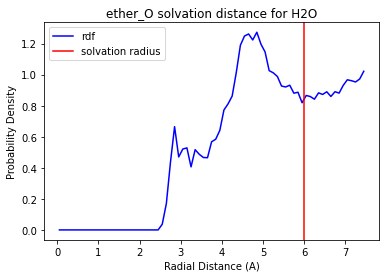

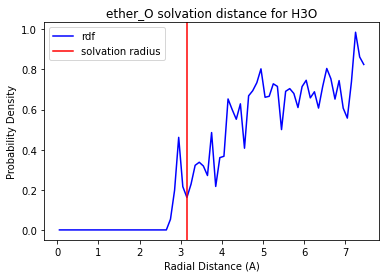

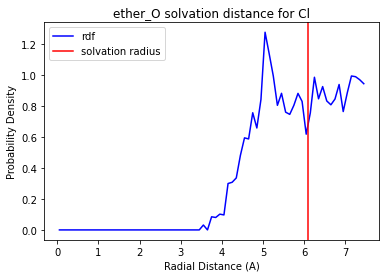

In [54]:
for solvent in solution1_O1.solvents.keys():
    # plot the RDF!
    solution1_O1.plot_solvation_radius("ether_O_1", solvent)
    plt.show()

In [55]:
solution1_O1.solvation_data.head(5)

distance   solute solvent  \
frame solute_ix solute_atom_ix solvent_atom_ix                              
0     1091      3195           330              3.009141  ether_O     H2O   
                               441              3.470112  ether_O     H2O   
                               1872             4.125755  ether_O     H2O   
                               1473             4.333779  ether_O     H2O   
                               906              4.496791  ether_O     H2O   

                                                solvent_ix  
frame solute_ix solute_atom_ix solvent_atom_ix              
0     1091      3195           330                     110  
                               441                     147  
                               1872                    624  
                               1473                    491  
                               906                     302

In [56]:
solution1_O1.coordination.cn_dict

{'Cl': 1.3639999999999999,
 'H2O': 19.825333333333333,
 'H3O': 0.026666666666666665}

In [57]:
residence1_O1 = Residence.from_solute(solution1_O1)

In [58]:
residence1_O1.residence_times_cutoff

{'Cl': 4, 'H2O': 4, 'H3O': 2}

In [59]:
residence1_O1.residence_times_fit

{'Cl': 5.08, 'H2O': 4.45, 'H3O': 0.72}

/Users/user/software/solvation-analysis/solvation_analysis/residence.py:197: UserWarning: The fit for H2O failed so the exponential fit will not be plotted.
  warnings.warn(f'The fit for {res_name} failed so the exponential '


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Timestep (frames)', ylabel='Normalized Autocovariance'>)

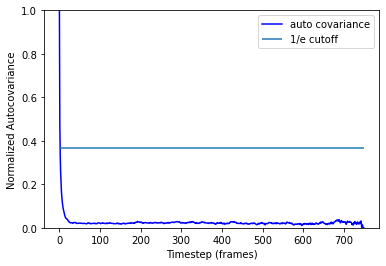

In [60]:
residence1_O1.plot_auto_covariance('H2O')

/Users/user/software/solvation-analysis/solvation_analysis/residence.py:197: UserWarning: The fit for H3O failed so the exponential fit will not be plotted.
  warnings.warn(f'The fit for {res_name} failed so the exponential '


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Timestep (frames)', ylabel='Normalized Autocovariance'>)

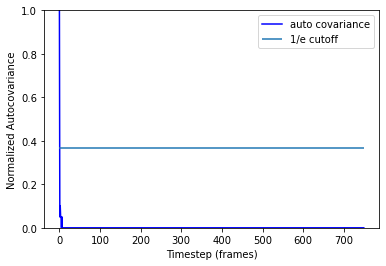

In [61]:
residence1_O1.plot_auto_covariance('H3O')

/Users/user/software/solvation-analysis/solvation_analysis/residence.py:197: UserWarning: The fit for Cl failed so the exponential fit will not be plotted.
  warnings.warn(f'The fit for {res_name} failed so the exponential '


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Timestep (frames)', ylabel='Normalized Autocovariance'>)

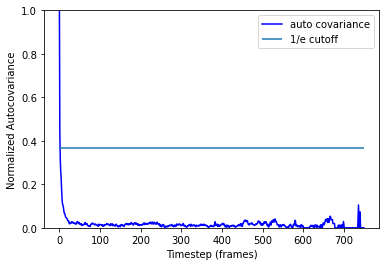

In [62]:
residence1_O1.plot_auto_covariance('Cl')

### solution1 of ketone O

In [63]:
solution1_O2 = Solute.from_atoms(ketone_O_1, {'H2O': h2O_O_1, 'H3O': h3O_O_1, 'Cl': Cl_1}, \
                                 solute_name = "ketone_O", radii={"H2O": 4.1,"H3O": 4, "Cl": 4.5})


In [64]:
print(solution1_O2.atom_solutes)

{'ketone_O': <solvation_analysis.solute.Solute object at 0x150fa4040>}


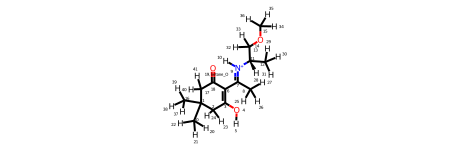

In [65]:
rename_solutes = {'solute_0': 'ketone_O_1'}
solution1_O2 = Solute.from_atoms(
    ketone_O_1, {'H2O': h2O_O_1, 'H3O': h3O_O_1, 'Cl': Cl_1}, 
    solute_name = "ketone_O", 
    radii={"H2O": 4.1,"H3O": 4, "Cl": 4.5},
    rename_solutes = rename_solutes,
)
solution1_O2.draw_molecule('ketone_O')

In [66]:
solution1_O2.atom_solutes

{'ketone_O': <solvation_analysis.solute.Solute at 0x150ecb430>}

In [67]:
solution1_O2.solvents

{'H2O': <AtomGroup with 910 atoms>,
 'H3O': <AtomGroup with 90 atoms>,
 'Cl': <AtomGroup with 91 atoms>}

In [68]:
solution1_O2.radii['H2O'] = 3.3
solution1_O2.radii['H3O'] = 3.65
solution1_O2.radii['Cl'] = 3.55
solution1_O2.run(step = 2)

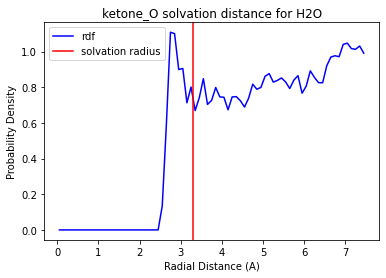

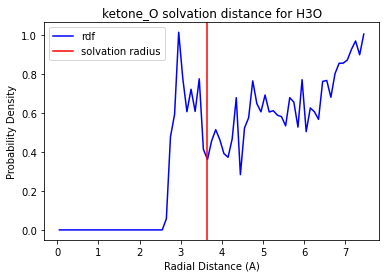

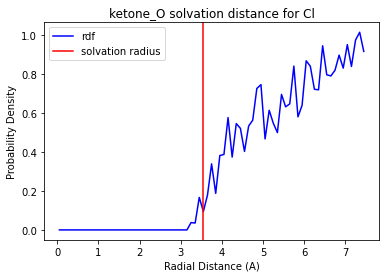

In [69]:
for solvent in solution1_O2.solvents.keys():
    # plot the RDF!
    solution1_O2.plot_solvation_radius("ketone_O_1", solvent)
    plt.show()

In [70]:
solution1_O2.solvation_data.head(5)

distance    solute solvent  \
frame solute_ix solute_atom_ix solvent_atom_ix                               
0     1091      3200           2379             2.863690  ketone_O     H2O   
                               2646             2.896514  ketone_O     H2O   
                               1677             3.089166  ketone_O     H2O   
2     1091      3200           1383             2.865685  ketone_O     H2O   
                               1677             2.970882  ketone_O     H2O   

                                                solvent_ix  
frame solute_ix solute_atom_ix solvent_atom_ix              
0     1091      3200           2379                    793  
                               2646                    882  
                               1677                    559  
2     1091      3200           1383                    461  
                               1677                    559

In [71]:
solution1_O2.coordination.cn_dict

{'Cl': 0.012, 'H2O': 1.816, 'H3O': 0.204}

In [72]:
residence1_O2 = Residence.from_solute(solution1_O2)

In [73]:
residence1_O2.residence_times_cutoff

{'Cl': 2, 'H2O': 2, 'H3O': 2}

In [74]:
residence1_O2.residence_times_fit

{'Cl': 0.9, 'H2O': 1.32, 'H3O': 2.28}

/Users/user/software/solvation-analysis/solvation_analysis/residence.py:197: UserWarning: The fit for H2O failed so the exponential fit will not be plotted.
  warnings.warn(f'The fit for {res_name} failed so the exponential '


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Timestep (frames)', ylabel='Normalized Autocovariance'>)

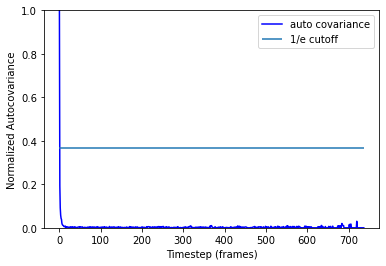

In [75]:
residence1_O2.plot_auto_covariance('H2O')

/Users/user/software/solvation-analysis/solvation_analysis/residence.py:197: UserWarning: The fit for H3O failed so the exponential fit will not be plotted.
  warnings.warn(f'The fit for {res_name} failed so the exponential '


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Timestep (frames)', ylabel='Normalized Autocovariance'>)

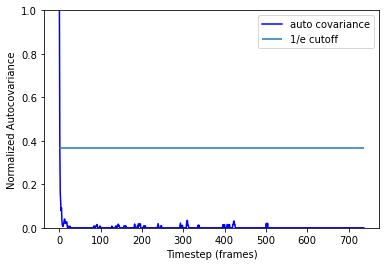

In [76]:
residence1_O2.plot_auto_covariance('H3O')

/Users/user/software/solvation-analysis/solvation_analysis/residence.py:197: UserWarning: The fit for Cl failed so the exponential fit will not be plotted.
  warnings.warn(f'The fit for {res_name} failed so the exponential '


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Timestep (frames)', ylabel='Normalized Autocovariance'>)

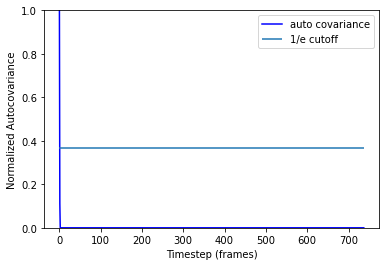

In [77]:
residence1_O2.plot_auto_covariance('Cl')

### solution1 of enol O

In [78]:
solution1_O3 = Solute.from_atoms(oh_O_1, {'H2O': h2O_O_1, 'H3O': h3O_O_1, 'Cl': Cl_1}, \
                                 solute_name = "enol_O", radii={"H2O": 4.1,"H3O": 4, "Cl": 4.5})



In [79]:
print(solution1_O3.atom_solutes)

{'enol_O': <solvation_analysis.solute.Solute object at 0x152b13100>}


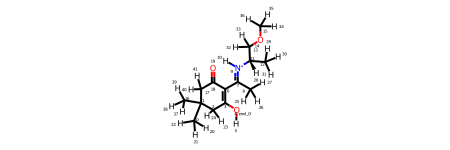

In [80]:
rename_solutes = {'solute_0': 'oh_O_1'}
solution1_O3 = Solute.from_atoms(
    oh_O_1, {'H2O': h2O_O_1, 'H3O': h3O_O_1, 'Cl': Cl_1}, 
    solute_name = "enol_O", 
    radii={"H2O": 4.1,"H3O": 4, "Cl": 4.5},
    rename_solutes = rename_solutes,
)
solution1_O3.draw_molecule('enol_O')

In [81]:
solution1_O3.atom_solutes

{'enol_O': <solvation_analysis.solute.Solute at 0x152eb9ca0>}

In [82]:
solution1_O3.solvents

{'H2O': <AtomGroup with 910 atoms>,
 'H3O': <AtomGroup with 90 atoms>,
 'Cl': <AtomGroup with 91 atoms>}

In [83]:
solution1_O3.radii['H2O'] = 2.95
solution1_O3.radii['H3O'] = 2.9
solution1_O3.radii['Cl'] = 3.5
solution1_O3.run(step = 2)

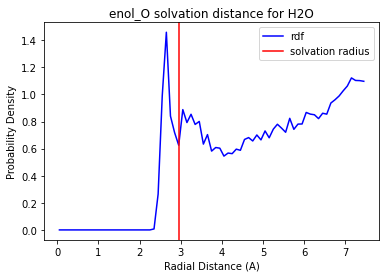

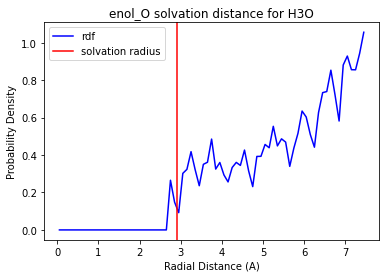

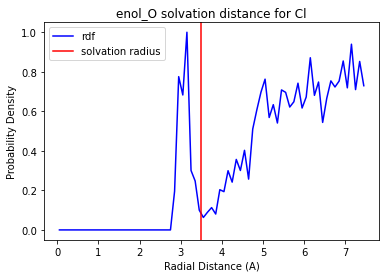

In [84]:
for solvent in solution1_O3.solvents.keys():
    # plot the RDF!
    solution1_O3.plot_solvation_radius("oh_O_1", solvent)
    plt.show()

In [85]:
solution1_O3.solvation_data.head(5)

distance  solute solvent  \
frame solute_ix solute_atom_ix solvent_atom_ix                             
0     1091      3185           1935             2.530287  enol_O     H2O   
                               3145             2.796114  enol_O     H3O   
2     1091      3185           1935             2.598389  enol_O     H2O   
4     1091      3185           1935             2.722643  enol_O     H2O   
6     1091      3185           1935             2.759490  enol_O     H2O   

                                                solvent_ix  
frame solute_ix solute_atom_ix solvent_atom_ix              
0     1091      3185           1935                    645  
                               3145                   1082  
2     1091      3185           1935                    645  
4     1091      3185           1935                    645  
6     1091      3185           1935                    645

In [86]:
solution1_O3.coordination.cn_dict

{'Cl': 0.10666666666666666, 'H2O': 1.132, 'H3O': 0.010666666666666666}

In [87]:
residence1_O3 = Residence.from_solute(solution1_O3)

In [88]:
residence1_O3.residence_times_cutoff

{'Cl': 12, 'H2O': 6, 'H3O': 2}

In [89]:
residence1_O3.residence_times_fit

{'Cl': 9.58, 'H2O': 5.47, 'H3O': 0.09}

/Users/user/software/solvation-analysis/solvation_analysis/residence.py:197: UserWarning: The fit for H2O failed so the exponential fit will not be plotted.
  warnings.warn(f'The fit for {res_name} failed so the exponential '


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Timestep (frames)', ylabel='Normalized Autocovariance'>)

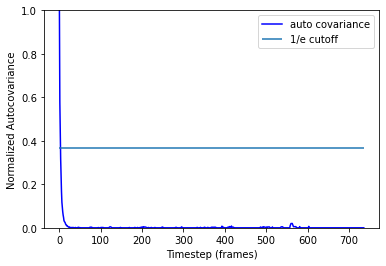

In [90]:
residence1_O3.plot_auto_covariance('H2O')

/Users/user/software/solvation-analysis/solvation_analysis/residence.py:197: UserWarning: The fit for H3O failed so the exponential fit will not be plotted.
  warnings.warn(f'The fit for {res_name} failed so the exponential '


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Timestep (frames)', ylabel='Normalized Autocovariance'>)

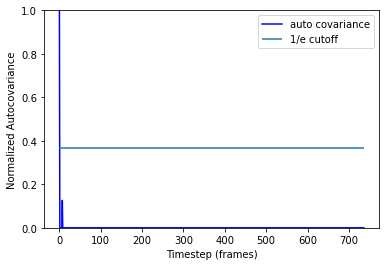

In [91]:
residence1_O3.plot_auto_covariance('H3O')

/Users/user/software/solvation-analysis/solvation_analysis/residence.py:197: UserWarning: The fit for Cl failed so the exponential fit will not be plotted.
  warnings.warn(f'The fit for {res_name} failed so the exponential '


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Timestep (frames)', ylabel='Normalized Autocovariance'>)

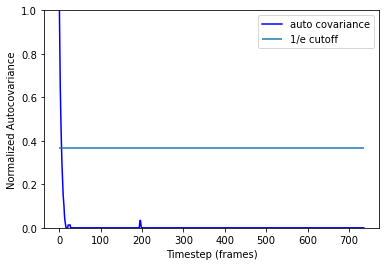

In [92]:
residence1_O3.plot_auto_covariance('Cl')